# AVL Trees

## Time complexity testing of Search (Lookup), Insertions, Deletions

n=    1000 | insert=0.000018506s | lookup=0.000003453s | delete=0.000031999s
n=   10000 | insert=0.000012223s | lookup=0.000001515s | delete=0.000011745s
n=  100000 | insert=0.000019187s | lookup=0.000003163s | delete=0.000025981s
n= 1000000 | insert=0.000030800s | lookup=0.000004906s | delete=0.000023548s
n=10000000 | insert=0.000047823s | lookup=0.000007930s | delete=0.000032613s


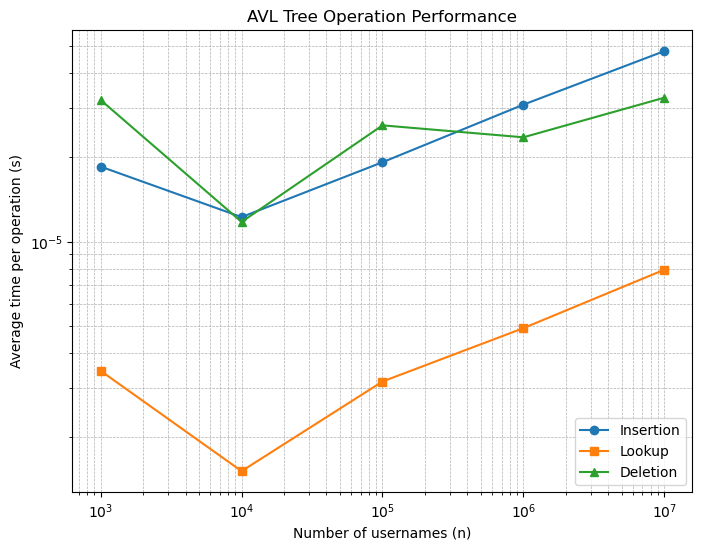

In [ ]:
import random
import string
import time
import matplotlib.pyplot as plt

# ---- reproducibility ----
random.seed(42)

# ---- character set for random usernames ----
CHARS = string.ascii_lowercase + string.digits

# ---- dataset sizes ----
n_list_avl = [10**3, 10**4, 10**5, 10**6, 10**7]  # increase later if desired
times_insert = []
times_lookup = []
times_delete = []

# ---- import your AVL tree class (or paste it here) ----
# from avl_tree import AVLTree  # later use this when in separate files

# AVLTree implementation
class AVLNode:
    """Node of an AVL Tree"""
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Height of a leaf node is 1

class AVLTree:
    """AVL Tree implementation with insert, delete, search, and traversals."""
    def __init__(self):
        self.root = None

    # Utility functions

    def _height(self, node):
        """Return the height of a node."""
        return node.height if node else 0

    def _update_height(self, node):
        """Recalculate height based on children."""
        node.height = 1 + max(self._height(node.left), self._height(node.right))

    def _balance_factor(self, node):
        """Compute the balance factor = left_height - right_height."""
        return self._height(node.left) - self._height(node.right) if node else 0

    def _min_node(self, node):
        """Return node with smallest key (used in deletion)."""
        while node.left:
            node = node.left
        return node

    # Rotations (O(1))
    def _right_rotate(self, y):
        """
        Perform a right rotation around node y.
                y                x
               / \              / \
              x   T3   -->     T1  y
             / \                  / \
            T1  T2               T2  T3
        """
        x = y.left
        T2 = x.right

        # Perform rotation
        x.right = y
        y.left = T2

        # Update heights
        self._update_height(y)
        self._update_height(x)

        return x  # New root of subtree

    def _left_rotate(self, x):
        """
        Perform a left rotation around node x.
            x                     y
           / \                   / \
          T1  y      -->        x  T3
             / \               / \
            T2  T3            T1  T2
        """
        y = x.right
        T2 = y.left

        # Perform rotation
        y.left = x
        x.right = T2

        # Update heights
        self._update_height(x)
        self._update_height(y)

        return y  # New root of subtree

    # Rebalancing
    def _rebalance(self, node):
        """Rebalance a node if it's unbalanced (balance factor < -1 or > 1)."""
        self._update_height(node)
        bf = self._balance_factor(node)

        # Left heavy
        if bf > 1:
            # Left-Right case
            if self._balance_factor(node.left) < 0:
                node.left = self._left_rotate(node.left)
            # Left-Left case
            return self._right_rotate(node)

        # Right heavy
        if bf < -1:
            # Right-Left case
            if self._balance_factor(node.right) > 0:
                node.right = self._right_rotate(node.right)
            # Right-Right case
            return self._left_rotate(node)

        return node  # No imbalance

    # Insert (O(log n))
    def _insert(self, node, key, value=None):
        """Recursive helper to insert a key and rebalance."""
        if not node:
            return AVLNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
        else:
            # Duplicate key — update value
            node.value = value
            return node

        return self._rebalance(node)

    def insert(self, key, value=None):
        """Public method to insert a key-value pair."""
        self.root = self._insert(self.root, key, value)

    # Search (O(log n))
    def search(self, key):
        """Return the value for the given key, or None if not found."""
        node = self.root
        while node:
            if key == node.key:
                return node.value if node.value is not None else node.key
            node = node.left if key < node.key else node.right
        return None

    # Delete (O(log n))
    def _delete(self, node, key):
        """Recursive helper to delete a key and rebalance."""
        if not node:
            return None

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            # Node to delete found
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            else:
                # Node has two children: find inorder successor
                succ = self._min_node(node.right)
                node.key, node.value = succ.key, succ.value
                node.right = self._delete(node.right, succ.key)

        return self._rebalance(node) if node else None

    def delete(self, key):
        """Public method to delete a key."""
        self.root = self._delete(self.root, key)

    # Traversals (O(n))
    def inorder(self):
        """Return in-order traversal as a list of (key, value)."""
        res = []
        def _in(node):
            if not node:
                return
            _in(node.left)
            res.append((node.key, node.value))
            _in(node.right)
        _in(self.root)
        return res

    def preorder(self):
        """Return pre-order traversal as a list of (key, value)."""
        res = []
        def _pre(node):
            if not node:
                return
            res.append((node.key, node.value))
            _pre(node.left)
            _pre(node.right)
        _pre(self.root)
        return res

    def postorder(self):
        """Return post-order traversal as a list of (key, value)."""
        res = []
        def _post(node):
            if not node:
                return
            _post(node.left)
            _post(node.right)
            res.append((node.key, node.value))
        _post(self.root)
        return res

    # Pretty-print (for debugging small trees)
    def _str(self, node, level=0, pref="Root: "):
        """Helper to print the tree structure."""
        if not node:
            return ""
        s = " " * (level * 4) + f"{pref}{node.key}(h={node.height})\n"
        s += self._str(node.left, level+1, "L--- ")
        s += self._str(node.right, level+1, "R--- ")
        return s

    def __str__(self):
        """String representation of the entire tree."""
        return self._str(self.root) or "<empty tree>"



def random_usernames(n, length=6):
    """Generate n random usernames of given length."""
    return [''.join(random.choice(CHARS) for _ in range(length)) + str(i) for i in range(n)]


# ---- experiment ----
for n in n_list_avl:
    usernames = random_usernames(n)
    lookup_count = min(1000, n // 2)

    # ---------- insertion timing ----------
    tree = AVLTree()
    start = time.perf_counter_ns()
    for name in usernames:
        tree.insert(name)
    insert_time = (time.perf_counter_ns() - start) / n / 1e9  # average time per insert
    times_insert.append(insert_time)

    # ---------- lookup timing ----------
    lookup_names = random.sample(usernames, lookup_count)
    # add some negative lookups too
    lookup_names += [''.join(random.choice(CHARS) for _ in range(6)) for _ in range(lookup_count)]

    start = time.perf_counter_ns()
    for name in lookup_names:
        tree.search(name)
    lookup_time = (time.perf_counter_ns() - start) / len(lookup_names) / 1e9
    times_lookup.append(lookup_time)

    # ---------- deletion timing ----------
    delete_names = random.sample(usernames, lookup_count)
    start = time.perf_counter_ns()
    for name in delete_names:
        tree.delete(name)
    delete_time = (time.perf_counter_ns() - start) / len(delete_names) / 1e9
    times_delete.append(delete_time)

    print(f"n={n:>8} | insert={insert_time:.9f}s | lookup={lookup_time:.9f}s | delete={delete_time:.9f}s")

# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_avl, times_insert, 'o-', label='Insertion')
plt.plot(n_list_avl, times_lookup, 's-', label='Lookup')
plt.plot(n_list_avl, times_delete, '^-', label='Deletion')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per operation (s)")
plt.title("AVL Tree Operation Performance")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Red-Black Tree

n=    1000 | insert=0.000002756s | lookup=0.000001472s | delete=0.000002883s
n=   10000 | insert=0.000003206s | lookup=0.000002113s | delete=0.000002717s
n=  100000 | insert=0.000004518s | lookup=0.000003444s | delete=0.000006692s


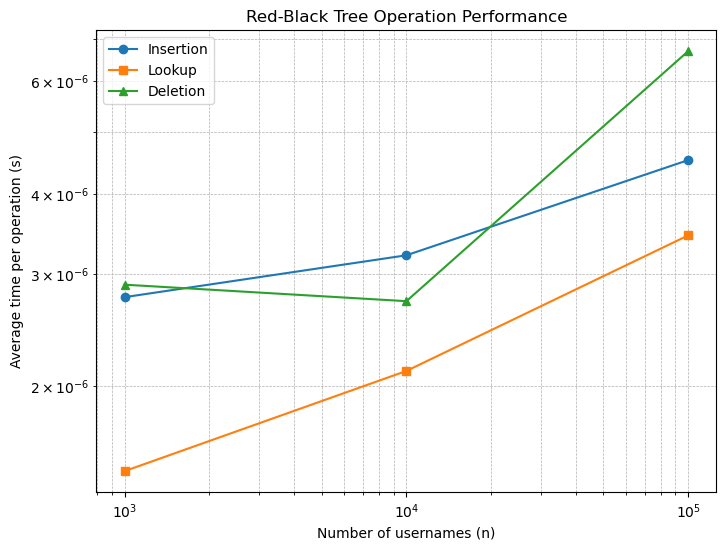

In [6]:
import random
import string
import time
import matplotlib.pyplot as plt

# ---------- reproducibility ----------
random.seed(42)

# ---------- character set ----------
CHARS = string.ascii_lowercase + string.digits

# ---------- dataset sizes ----------
n_list_rbt = [10**3, 10**4, 10**5]  # can scale higher later
times_insert = []
times_lookup = []
times_delete = []

# ==============================================================
#   SIMPLE RED-BLACK TREE IMPLEMENTATION
# ==============================================================

class RBNode:
    def __init__(self, key, value=None, color="RED"):
        self.key = key
        self.value = value
        self.color = color  # "RED" or "BLACK"
        self.left = None
        self.right = None
        self.parent = None


class RBTree:
    """Simplified Red-Black Tree with insert, search, and delete."""

    def __init__(self):
        self.NIL = RBNode(None, color="BLACK")  # Sentinel NIL node
        self.root = self.NIL

    # ------------- Utility -------------
    def _left_rotate(self, x):
        """Left rotation around node x (O(1))"""
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def _right_rotate(self, y):
        """Right rotation around node y (O(1))"""
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == None:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x

    # ------------- Insert -------------
    def insert(self, key, value=None):
        """Insert a new node (O(log n))"""
        new_node = RBNode(key, value, color="RED")
        new_node.left = self.NIL
        new_node.right = self.NIL

        y = None
        x = self.root
        while x != self.NIL:
            y = x
            x = x.left if key < x.key else x.right
        new_node.parent = y

        if y == None:
            self.root = new_node
        elif key < y.key:
            y.left = new_node
        else:
            y.right = new_node

        if new_node.parent == None:
            new_node.color = "BLACK"
            return

        if new_node.parent.parent == None:
            return

        self._fix_insert(new_node)

    def _fix_insert(self, k):
        """Restore Red-Black properties after insertion."""
        while k.parent.color == "RED":
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == "RED":  # Case 1
                    u.color = "BLACK"
                    k.parent.color = "BLACK"
                    k.parent.parent.color = "RED"
                    k = k.parent.parent
                else:
                    if k == k.parent.left:  # Case 2
                        k = k.parent
                        self._right_rotate(k)
                    # Case 3
                    k.parent.color = "BLACK"
                    k.parent.parent.color = "RED"
                    self._left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == "RED":
                    u.color = "BLACK"
                    k.parent.color = "BLACK"
                    k.parent.parent.color = "RED"
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self._left_rotate(k)
                    k.parent.color = "BLACK"
                    k.parent.parent.color = "RED"
                    self._right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = "BLACK"

    # ------------- Search -------------
    def search(self, key):
        """Return value if key exists (O(log n)), else None"""
        node = self.root
        while node != self.NIL and node.key is not None:
            if key == node.key:
                return node.value if node.value else node.key
            node = node.left if key < node.key else node.right
        return None

    # ------------- Deletion -------------
    def _transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def _minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node

    def delete(self, key):
        """Delete key (O(log n))"""
        z = self.root
        while z != self.NIL:
            if z.key == key:
                break
            z = z.left if key < z.key else z.right
        if z == self.NIL:
            return  # Key not found

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self._transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self._transplant(z, z.left)
        else:
            y = self._minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self._transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self._transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == "BLACK":
            self._fix_delete(x)

    def _fix_delete(self, x):
        """Restore Red-Black properties after deletion."""
        while x != self.root and x.color == "BLACK":
            if x == x.parent.left:
                s = x.parent.right
                if s.color == "RED":
                    s.color = "BLACK"
                    x.parent.color = "RED"
                    self._left_rotate(x.parent)
                    s = x.parent.right
                if s.left.color == "BLACK" and s.right.color == "BLACK":
                    s.color = "RED"
                    x = x.parent
                else:
                    if s.right.color == "BLACK":
                        s.left.color = "BLACK"
                        s.color = "RED"
                        self._right_rotate(s)
                        s = x.parent.right
                    s.color = x.parent.color
                    x.parent.color = "BLACK"
                    s.right.color = "BLACK"
                    self._left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == "RED":
                    s.color = "BLACK"
                    x.parent.color = "RED"
                    self._right_rotate(x.parent)
                    s = x.parent.left
                if s.right.color == "BLACK" and s.left.color == "BLACK":
                    s.color = "RED"
                    x = x.parent
                else:
                    if s.left.color == "BLACK":
                        s.right.color = "BLACK"
                        s.color = "RED"
                        self._left_rotate(s)
                        s = x.parent.left
                    s.color = x.parent.color
                    x.parent.color = "BLACK"
                    s.left.color = "BLACK"
                    self._right_rotate(x.parent)
                    x = self.root
        x.color = "BLACK"


# ==============================================================
#   PERFORMANCE EXPERIMENT
# ==============================================================

def random_usernames(n, length=6):
    """Generate n random usernames."""
    return [''.join(random.choice(CHARS) for _ in range(length)) + str(i) for i in range(n)]


for n in n_list_rbt:
    usernames = random_usernames(n)
    lookup_count = min(1000, n // 2)

    # ---------- insertion ----------
    tree = RBTree()
    start = time.perf_counter_ns()
    for name in usernames:
        tree.insert(name)
    insert_time = (time.perf_counter_ns() - start) / n / 1e9
    times_insert.append(insert_time)

    # ---------- lookup ----------
    lookup_names = random.sample(usernames, lookup_count)
    lookup_names += [''.join(random.choice(CHARS) for _ in range(6)) for _ in range(lookup_count)]

    start = time.perf_counter_ns()
    for name in lookup_names:
        tree.search(name)
    lookup_time = (time.perf_counter_ns() - start) / len(lookup_names) / 1e9
    times_lookup.append(lookup_time)

    # ---------- deletion ----------
    delete_names = random.sample(usernames, lookup_count)
    start = time.perf_counter_ns()
    for name in delete_names:
        tree.delete(name)
    delete_time = (time.perf_counter_ns() - start) / len(delete_names) / 1e9
    times_delete.append(delete_time)

    print(f"n={n:>8} | insert={insert_time:.9f}s | lookup={lookup_time:.9f}s | delete={delete_time:.9f}s")


# ==============================================================
#   PLOT RESULTS
# ==============================================================

plt.figure(figsize=(8,6))
plt.plot(n_list_rbt, times_insert, 'o-', label='Insertion')
plt.plot(n_list_rbt, times_lookup, 's-', label='Lookup')
plt.plot(n_list_rbt, times_delete, '^-', label='Deletion')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per operation (s)")
plt.title("Red-Black Tree Operation Performance")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
